# Time Series data generation

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
np.random.seed(1)

We will generate our data based on the equation of a wave: 
y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [26]:
# We define the 3 types of time series functions we are going to generate and the corresponding functions to generate anomalies

# the number of samples in a time series will be of 1024 values for computational reasons 
sample=1024

# noise parameters for each type of time series 
noise = 0.04*np.random.rand(sample)
noiseupd = 0.02*np.random.rand(sample)
noisedec = 0.005*np.random.rand(sample)

def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1024)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak, peak

def timeseriesDec(amplitude,frequency,phase,x,slope):

    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65 :
        for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)
    else:
         for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)+noisedec
        
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peakDec = abs(np.sin(0.01*x))*30 #+500*x
    peakDec += np.random.rand(1024)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec, peakDec

def updwntimeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noiseupd
    return y

def updwntimeseriesPeak(timeseriesPeakDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peak = np.sin(0.001*x)*60
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseriesPeakDec+peak, peak

## Regular time series data generation

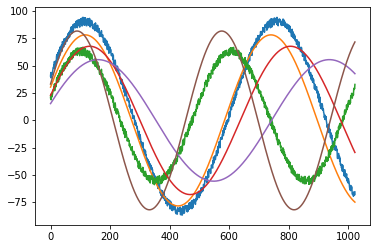

In [27]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p1 = np.random.rand(200)
a1 = np.random.rand(200)
w1 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1024))
peak=np.zeros(1000)

# We will create 1000 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
peak = np.zeros(1024)
for i in range(0,1000):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a1*rand,w1*rand_w,p1*rand,x)
    yValues.append((y,peak))
    if i <= 5:
        plt.plot(x,y)


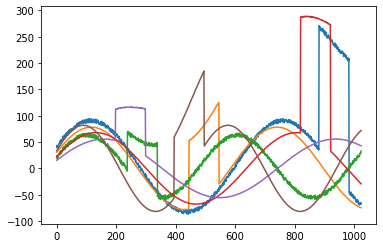

In [28]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y, peak = timeseriesPeak(yValues[i][0],x)
    ySpikes.append((y,peak))
    if i <= 5:
        plt.plot(x,y)
      

## Decreasing time series data generation

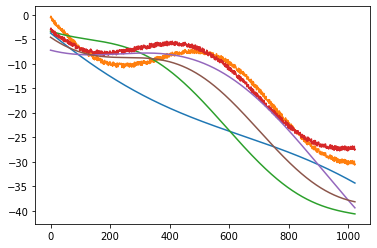

In [29]:
p2 = np.ones(200)
a2 = np.ones(200)
w2 = np.ones(200)

b = np.ones(200)

x = np.arange(start=0, stop=(1024))
yValuesDec = []
for i in range(0,1000):
    rand_w = np.random.uniform(0.002,0.01)
    rand_s = np.random.uniform(0.0002,0.0001)
    rand = np.random.uniform(0,3)
    rand_a = np.random.uniform(0.02,0.05)
    y = timeseriesDec(rand_a*a2,w2*rand_w,p2*rand,x,b*rand_s)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)



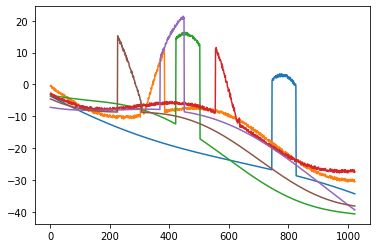

In [30]:
# We will create 200 time series with spikes
ySpikesDec = []
for i in range(0,len(yValuesDec)):
    y, peakDec = timeseriesPeakDec(yValuesDec[i],x)
    ySpikesDec.append((y,peakDec))
    if i <= 5:
        plt.plot(x,y)

## Irregular time series data generation

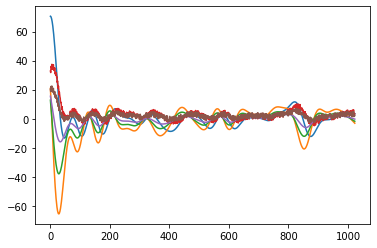

In [31]:
w3 = np.random.rand(200)*0.1#+0.1
p3 = np.random.rand(200)
a3 = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1024)

yValuesupdwn = []
for i in range(0,1000):
  randa = np.random.uniform(1,10)
  randp = np.random.uniform(1,20)
  y = updwntimeseries(a3*randa,w3,p3+randp,x)
  yValuesupdwn.append(y)
  if i <= 5:
      plt.plot(x,y)


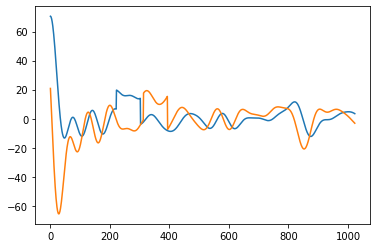

In [32]:
ySpikesupdwn = []
for i in range(0,len(yValuesupdwn)):
    y, peakupdwn = updwntimeseriesPeak(yValuesupdwn[i],x)
    ySpikesupdwn.append((y,peakupdwn))
    if i <= 1:
        plt.plot(x,y)

# Dataframe creation and preprocessing

In [33]:
data = yValues + ySpikes + ySpikesDec + ySpikesupdwn

In [34]:
def timeseries2Df(data):
    values = []
    peaks = []
    for i in range(len(data)):
        peak = [1 if x > 0 else 0 for x in data[i][1]]
        values.append(data[i][0])
        peaks.append(peak)
    d = { 'value': values , 'anomaly':peaks}
    return pd.DataFrame(data=d)

In [35]:
df = timeseries2Df(data)
df

,value,anomaly
0,"[40.6601697670541, 43.846432833666185, 38.8409...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[30.47932784084826, 31.203609176465175, 31.924...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[20.803160814287292, 23.932857638908963, 18.87...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[22.896581841916177, 23.49062262548757, 24.082...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[15.378168454502198, 15.809707611849936, 16.24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
3995,"[80.80866901678783, 80.58198035484422, 80.1106...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3996,"[-32.36453476353689, -34.58280357083917, -36.6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3997,"[25.234207908766766, 25.113808550538877, 24.91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3998,"[24.321187241358217, 21.228545638813905, 23.25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Scaling values

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaleDf(df):
  test = df['value']
  test = [item for sublist in test for item in sublist] 
  test = scaler.fit_transform(np.array(test).reshape(-1, 1))
  scaled = []
  test= [item for sublist in test for item in sublist]
  for i in range(0,len(test),1024):
    scaled.append(test[i:i+1024])
  df['value']=scaled
  return df


In [37]:
df=scaleDf(df)
df

,value,anomaly
0,"[0.3064447803573923, 0.3133987802354065, 0.302...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0.28422515440911955, 0.28580589404493484, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0.2631069783779432, 0.26993752277482563, 0.25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0.26767585711344655, 0.26897234753188626, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0.2512669653534423, 0.25220879695517046, 0.25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
3995,"[0.39406863722303487, 0.39357389058895376, 0.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3996,"[0.1470688042432471, 0.14222744598346448, 0.13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3997,"[0.2727777118705324, 0.27251494099916174, 0.27...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3998,"[0.27078504978424256, 0.26403537818549977, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Histogram of values

(array([1.791180e+05, 1.223131e+06, 2.139734e+06, 4.353400e+05,
        6.652700e+04, 1.456900e+04, 1.606500e+04, 1.499900e+04,
        5.586000e+03, 9.310000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

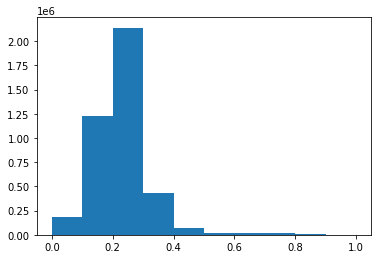

In [38]:
test = df['value']
test = [item for sublist in test for item in sublist]
plt.hist(test)

In [39]:
anomal = [item for sublist in df['anomaly'] for item in sublist]
np.unique(anomal)

array([0, 1])

# Read data frame and data frame partition

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['value'], df['anomaly'], test_size=0.3)

In [41]:
X_train = np.array([np.array(val) for val in X_train])
y_train  = np.array([np.array(val) for val in y_train])
X_test = np.array([np.array(val) for val in X_test])
y_test  = np.array([np.array(val) for val in y_test])

# Model training 

## Simple CNN


In [18]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D, MaxPooling1D
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

input_layer = Input(shape=(1024, 1))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1024, 32)          288       
                                                                 
 lstm (LSTM)                 (None, 1024, 32)          8320      
                                                                 
 dense (Dense)               (None, 1024, 1)           33        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

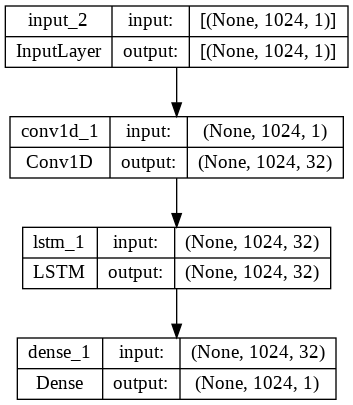

In [34]:
keras.utils.plot_model(model, to_file = "Model.png", show_shapes=True)

In [35]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = model.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 47s 566ms/step - loss: 0.3148 - accuracy: 0.9384 - val_loss: 0.2427 - val_accuracy: 0.9337
Epoch 2/200
79/79 [==============================] - 37s 467ms/step - loss: 0.2160 - accuracy: 0.9384 - val_loss: 0.2033 - val_accuracy: 0.9337
Epoch 3/200
79/79 [==============================] - 37s 473ms/step - loss: 0.1869 - accuracy: 0.9420 - val_loss: 0.1905 - val_accuracy: 0.9436
Epoch 4/200
79/79 [==============================] - 38s 478ms/step - loss: 0.1796 - accuracy: 0.9511 - val_loss: 0.1853 - val_accuracy: 0.9485
Epoch 5/200
79/79 [==============================] - 36s 461ms/step - loss: 0.1759 - accuracy: 0.9530 - val_loss: 0.1850 - val_accuracy: 0.9484
Epoch 6/200
79/79 [==============================] - 40s 502ms/step - loss: 0.1734 - accuracy: 0.9540 - val_loss: 0.1815 - val_accuracy: 0.9497
Epoch 7/200
79/79 [==============================] - 37s 470ms/step - loss: 0.1720 - accuracy: 0.9542 - val_loss: 0.1806 - val_accuracy:

In [36]:
save_model = model.save("simple.h5")

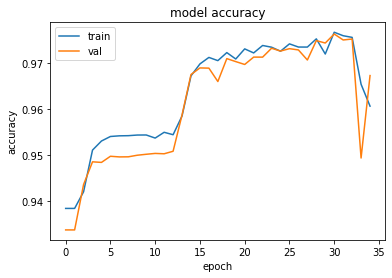

In [37]:
plt.plot(historytrain.history['accuracy'])
plt.plot(historytrain.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

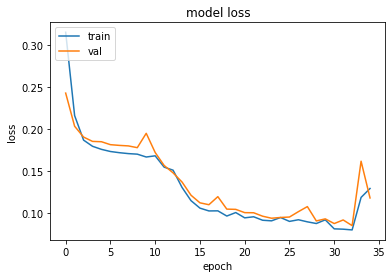

In [38]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
from sklearn.metrics import confusion_matrix


In [39]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10893405973911285
Test accuracy: 0.9702343940734863


##Deeper CNN


In [40]:
input_layer = Input(shape=(1024, 1))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv1)
conv2 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool1)
pool2 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv2)
conv3 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool2)
pool3 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv3)
conv4 = Conv1D(filters=128,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool3)
pool4= MaxPooling1D(pool_size=2,strides=1, padding='same')(conv4)
conv5 = Conv1D(filters=128,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool4)
pool5 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv5)
conv6 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(pool5)
pool6 = MaxPooling1D(pool_size=2,strides=1, padding='same')(conv6)
lstm = LSTM(32, return_sequences=True)(pool6)
conv2 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(lstm)
output_layer = Dense(1, activation='sigmoid')(lstm)
model2 = Model(inputs=input_layer, outputs=output_layer)

model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1024, 32)          288       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1024, 32)         0         
 )                                                               
                                                                 
 conv1d_3 (Conv1D)           (None, 1024, 64)          16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1024, 64)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 1024, 64)          3283

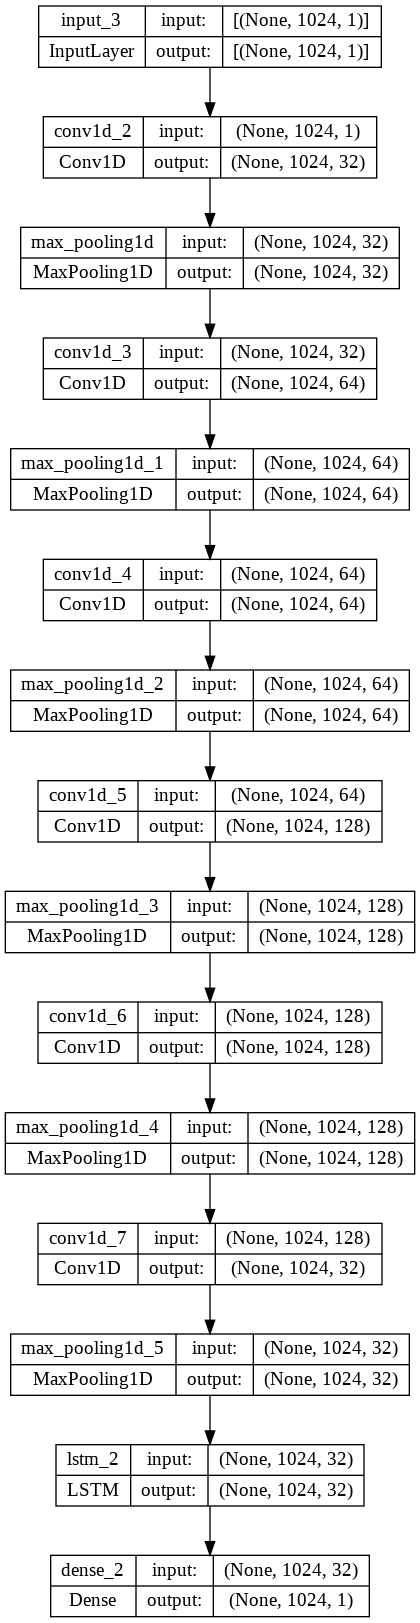

In [41]:
keras.utils.plot_model(model2, to_file = "Model2.png", show_shapes=True)

In [42]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = model2.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 174s 2s/step - loss: 0.2399 - accuracy: 0.9383 - val_loss: 0.2133 - val_accuracy: 0.9337
Epoch 2/200
79/79 [==============================] - 173s 2s/step - loss: 0.1956 - accuracy: 0.9384 - val_loss: 0.1955 - val_accuracy: 0.9337
Epoch 3/200
79/79 [==============================] - 173s 2s/step - loss: 0.1902 - accuracy: 0.9384 - val_loss: 0.1957 - val_accuracy: 0.9337
Epoch 4/200
79/79 [==============================] - 171s 2s/step - loss: 0.1824 - accuracy: 0.9387 - val_loss: 0.1747 - val_accuracy: 0.9367
Epoch 5/200
79/79 [==============================] - 170s 2s/step - loss: 0.0982 - accuracy: 0.9705 - val_loss: 0.0587 - val_accuracy: 0.9850
Epoch 6/200
79/79 [==============================] - 170s 2s/step - loss: 0.0444 - accuracy: 0.9910 - val_loss: 0.0483 - val_accuracy: 0.9905
Epoch 7/200
79/79 [==============================] - 170s 2s/step - loss: 0.0305 - accuracy: 0.9944 - val_loss: 0.0305 - val_accuracy: 0.9945
Epoch 

In [43]:
save_model2 = model2.save("deeper.h5")

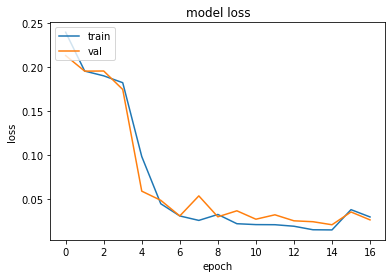

In [44]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023035569116473198
Test accuracy: 0.9956364035606384


##Unet


In [42]:
from keras.layers import Input, Dense, Conv1DTranspose, MaxPooling1D, Conv1D, Dropout, concatenate
from keras.models import Model

def build_model(input_layer, start_neurons):
    conv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(input_layer)
    conv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(conv1)
    pool1 = MaxPooling1D(2)(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(pool1)
    conv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(conv2)
    pool2 = MaxPooling1D(2)(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(pool2)
    conv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(conv3)
    pool3 = MaxPooling1D(2)(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv1D(start_neurons * 8, 8, activation="relu", padding="same")(pool3)
    conv4 = Conv1D(start_neurons * 8, 8, activation="relu", padding="same")(conv4)
    pool4 = MaxPooling1D(2)(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv1D(start_neurons * 16, 8, activation="relu", padding="same")(pool4)
    convm = Conv1D(start_neurons * 16, 8, activation="relu", padding="same")(convm)
    
    deconv4 = Conv1DTranspose(start_neurons * 8, 8, strides=2, padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv1D(start_neurons * 8,8, activation="relu", padding="same")(uconv4)
    uconv4 = Conv1D(start_neurons * 8, 8, activation="relu", padding="same")(uconv4)

    deconv3 = Conv1DTranspose(start_neurons * 4, 8, strides=2, padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(uconv3)
    uconv3 = Conv1D(start_neurons * 4, 8, activation="relu", padding="same")(uconv3)

    deconv2 = Conv1DTranspose(start_neurons * 2, 8, strides=2, padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(uconv2)
    uconv2 = Conv1D(start_neurons * 2, 8, activation="relu", padding="same")(uconv2)

    deconv1 = Conv1DTranspose(start_neurons * 1, 8, strides=2, padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(uconv1)
    uconv1 = Conv1D(start_neurons * 1, 8, activation="relu", padding="same")(uconv1)
    
    output_layer = Conv1D(1, 8, padding="same", activation="sigmoid")(uconv1)
    
    return output_layer

input_layer = Input(shape=(1024, 1))  # If input=1000 error on convm
output_layer = build_model(input_layer, 16)

In [43]:
Unet1d = Model(inputs=input_layer, outputs=output_layer)
Unet1d.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 conv1d_20 (Conv1D)             (None, 1024, 16)     144         ['input_3[0][0]']                
                                                                                                  
 conv1d_21 (Conv1D)             (None, 1024, 16)     2064        ['conv1d_20[0][0]']              
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 512, 16)     0           ['conv1d_21[0][0]']              
                                                                                            

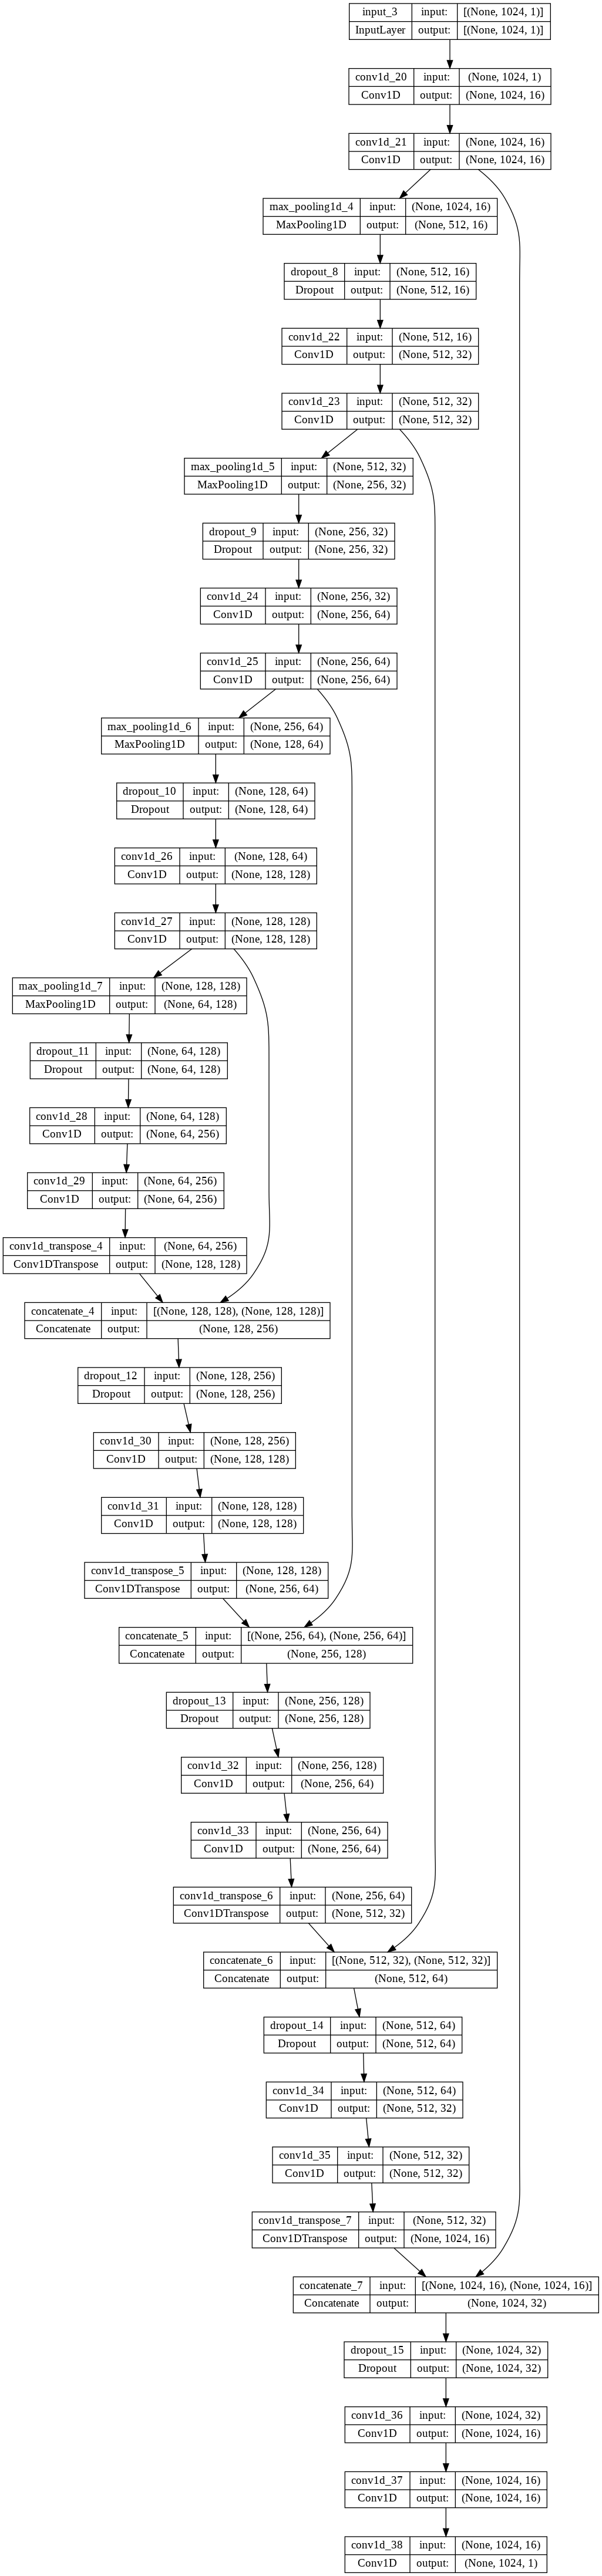

In [44]:
keras.utils.plot_model(Unet1d, to_file = "Unet1d.png", show_shapes=True)

In [45]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

Unet1d.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = Unet1d.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 127s 2s/step - loss: 0.2570 - accuracy: 0.9182 - val_loss: 0.1839 - val_accuracy: 0.9388
Epoch 2/200
79/79 [==============================] - 119s 2s/step - loss: 0.1289 - accuracy: 0.9493 - val_loss: 0.0630 - val_accuracy: 0.9820
Epoch 3/200
79/79 [==============================] - 119s 2s/step - loss: 0.0649 - accuracy: 0.9808 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 4/200
79/79 [==============================] - 119s 2s/step - loss: 0.0465 - accuracy: 0.9868 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 5/200
79/79 [==============================] - 118s 1s/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.0230 - val_accuracy: 0.9939
Epoch 6/200
79/79 [==============================] - 118s 1s/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0311 - val_accuracy: 0.9913
Epoch 7/200
79/79 [==============================] - 120s 2s/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0184 - val_accuracy: 0.9950
Epoch 

In [24]:
save_Unet1d =Unet1d.save("unet.h5")

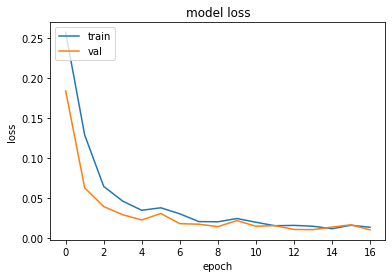

In [46]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
score = Unet1d.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.007681609597057104
Test accuracy: 0.9981388449668884


##Bidirectional lstm


In [48]:
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.layers import Dense,Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM


In [49]:
input_layer = Input(shape=(1024, 1))
lstm1 = Bidirectional(LSTM(32, return_sequences=True))(input_layer)
output_layer =TimeDistributed(Dense(1, activation='sigmoid'))(lstm1)
model_bi = Model(inputs=input_layer, outputs=output_layer)
model_bi.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 bidirectional (Bidirectiona  (None, 1024, 64)         8704      
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 1024, 1)          65        
 ibuted)                                                         
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


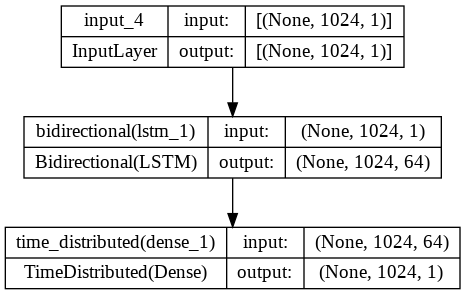

In [50]:
keras.utils.plot_model(model_bi, to_file = "Model_bi.png", show_shapes=True)

In [51]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model_bi.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_bi = model_bi.fit(X_train, y_train, epochs=200, batch_size=32 , validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 49s 579ms/step - loss: 0.3616 - accuracy: 0.9058 - val_loss: 0.2318 - val_accuracy: 0.9388
Epoch 2/200
79/79 [==============================] - 45s 570ms/step - loss: 0.2313 - accuracy: 0.9383 - val_loss: 0.2254 - val_accuracy: 0.9388
Epoch 3/200
79/79 [==============================] - 46s 580ms/step - loss: 0.2110 - accuracy: 0.9385 - val_loss: 0.1938 - val_accuracy: 0.9415
Epoch 4/200
79/79 [==============================] - 47s 591ms/step - loss: 0.1899 - accuracy: 0.9466 - val_loss: 0.1895 - val_accuracy: 0.9496
Epoch 5/200
79/79 [==============================] - 45s 575ms/step - loss: 0.1819 - accuracy: 0.9497 - val_loss: 0.1875 - val_accuracy: 0.9486
Epoch 6/200
79/79 [==============================] - 45s 575ms/step - loss: 0.1787 - accuracy: 0.9503 - val_loss: 0.1697 - val_accuracy: 0.9497
Epoch 7/200
79/79 [==============================] - 45s 573ms/step - loss: 0.1695 - accuracy: 0.9508 - val_loss: 0.1688 - val_accuracy:

In [52]:
save_model_bi =model_bi.save("bidirectional.h5")

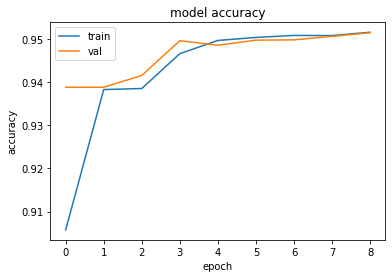

In [53]:
plt.plot(history_bi.history['accuracy'])
plt.plot(history_bi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

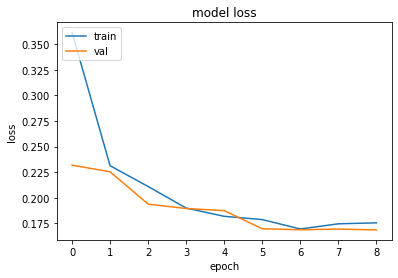

In [54]:
plt.plot(history_bi.history['loss'])
plt.plot(history_bi.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [55]:
score = model_bi.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1664087027311325
Test accuracy: 0.9547265768051147
